## Customer Targeting: Predicting Term Deposit Subscriptions in Bank Marketing

**Problem Statement** <br>
The goal is to develop a predictive model to classify whether a client will subscribe to a term deposit based on demographic, socio-economic, and campaign-related factors.

**Variable Descriptions**
1. **age:** (Numeric) Age of the client.
2. **job:** (Categorical) Type of job (e.g., admin, technician, blue-collar, etc.).
3. **marital:** (Categorical) Marital status (e.g., married, single, divorced).
4. **education:** (Categorical) Education level of the client (e.g., primary, secondary,tertiary, unknown).
5. **default:** (Binary) Whether the client has credit in default (yes/no).
6. **housing:** (Binary) Whether the client has a housing loan (yes/no).
7. **loan:** (Binary) Whether the client has a personal loan (yes/no).
8. **contact:** (Categorical) Contact communication type (e.g., cellular, telephone).
9. **month:** (Categorical) Last contact month of the year (e.g., January, February).
10. **day_of_week:** (Categorical) Last contact day of the week (e.g., Monday, Tuesday).
11. **duration:** (Numeric) Last contact duration, in seconds. Note: This feature is highly predictive but should be handled carefully in predictive modelling.
12. **campaign:** (Numeric) Number of contacts performed during this campaign and for this client (includes the last contact).
13. **pdays:** (Numeric) Number of days since the client was last contacted from a previous campaign. -1 means the client was not previously contacted.
14. **previous:** (Numeric) Number of contacts performed before this campaign and for this client.
15. **poutcome:** (Categorical) Outcome of the previous marketing campaign (e.g., success, failure, unknown, non-existent).
16. **emp_var_rate:** (Numeric) Employment variation rate (quarterly indicator).
17. **cons_price_idx:** (Numeric) Consumer price index (monthly indicator).
18. **cons_conf_idx:** (Numeric) Consumer confidence index (monthly indicator).
19. **euribor3m:** (Numeric) Euribor 3-month rate.
20. **nr_employed:** (Numeric) Number of employees (quarterly indicator).
21. **y:** (Binary) Target variable indicating whether the client subscribed to a term deposit (yes/no).

**Importing libraries**

In [ ]:
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    U

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, f1_score
from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight
from scipy.stats import uniform
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

### **Data Loading and Exploratory Data Analysis.**

In [2]:
# Data Loading
data = pd.read_csv("https://raw.githubusercontent.com/UmaBetageri/Predicting-Term-Deposit-Subscriptions-in-Bank-Marketing/main/banking.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
#To Check the datatypes of the parameters
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [4]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [5]:
data.duplicated().sum()

12

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
# Extracting Numerical Values
numerical_df = data.select_dtypes(include=['number'])
numerical = numerical_df.drop('y', axis=1)

**Histogram**

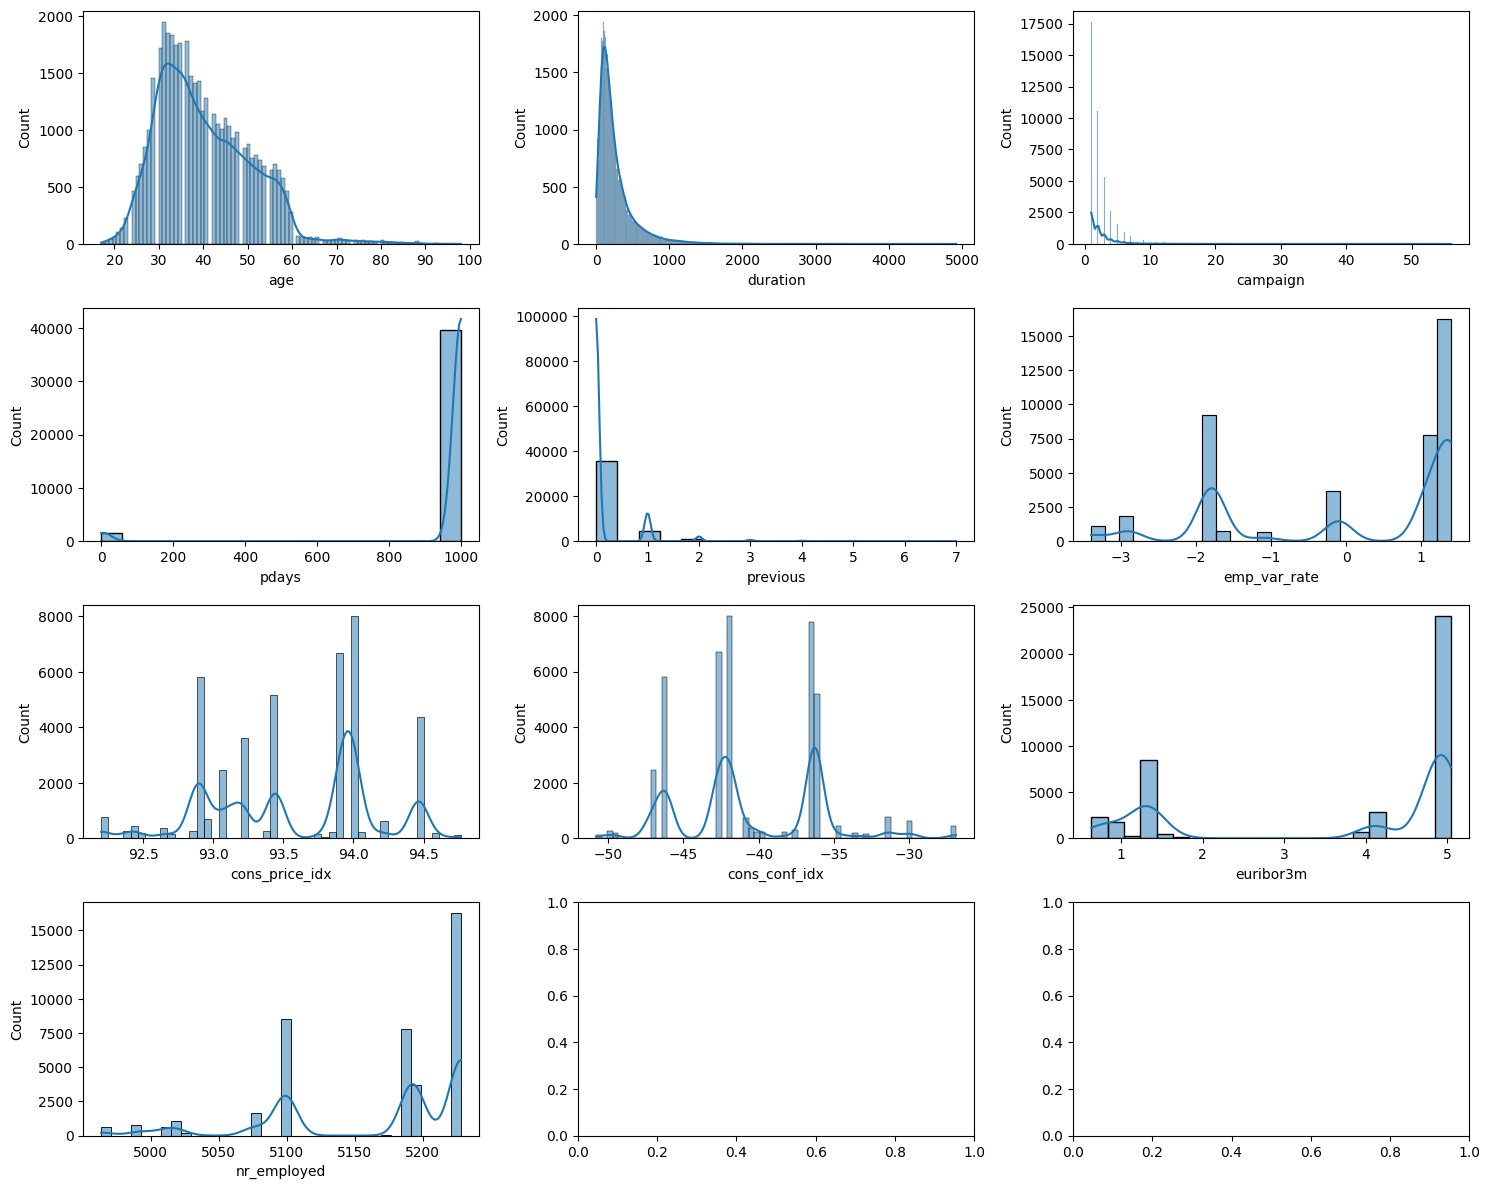

In [8]:
# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical columns and plot
for i, col in enumerate(numerical):
    sns.histplot(numerical[col], kde=True, ax=axes[i])
    #axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

**Box Plots**

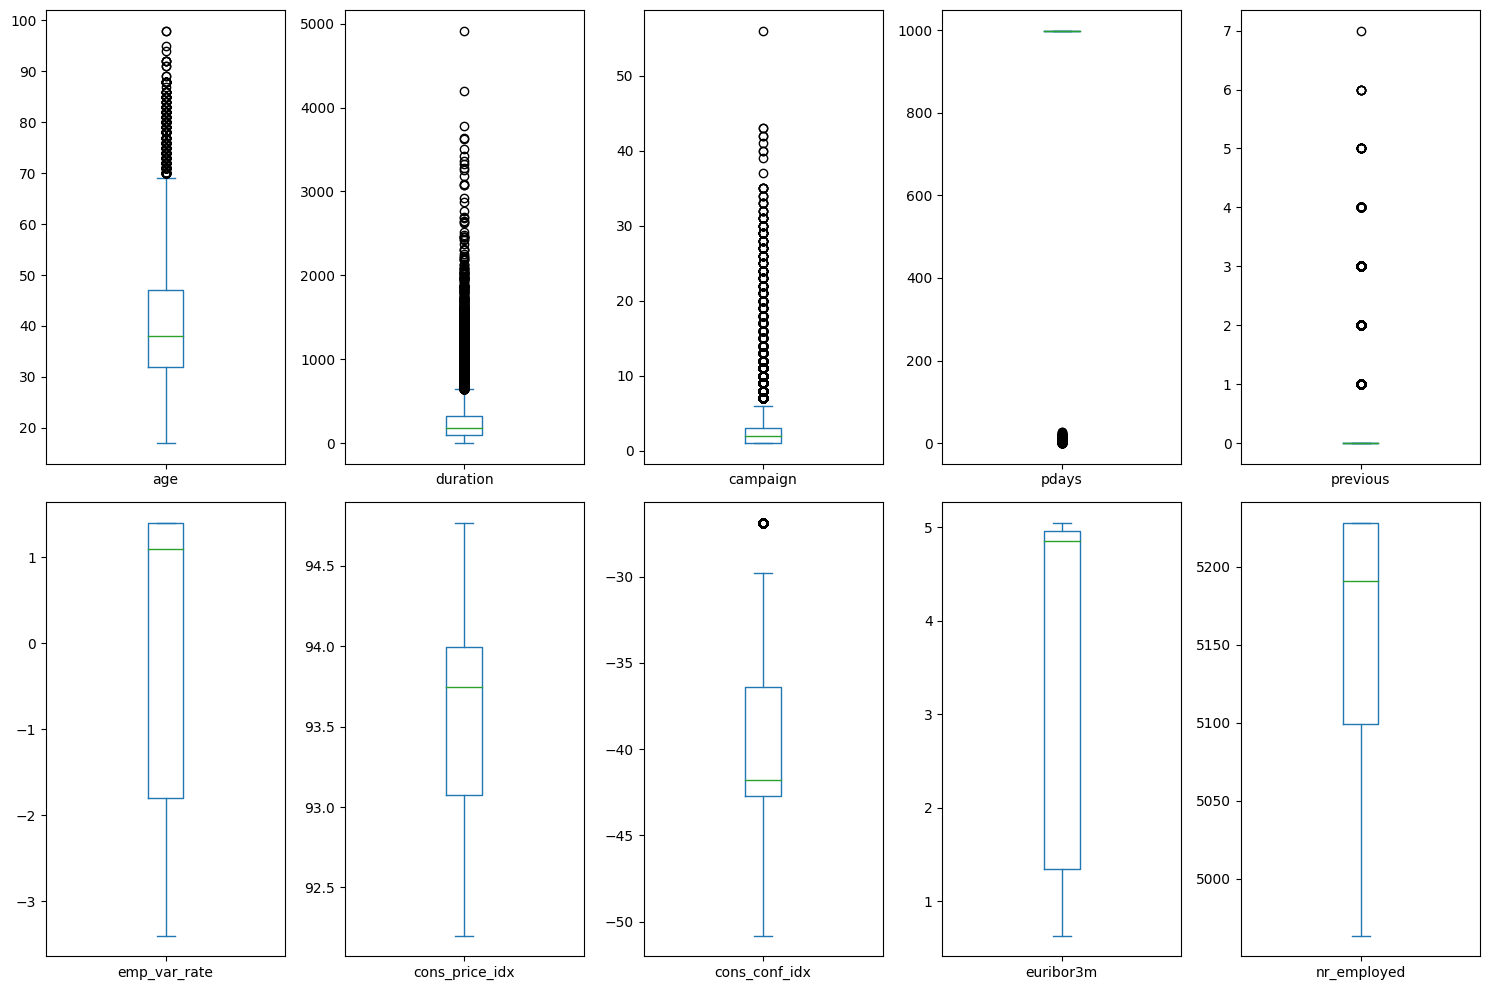

In [9]:
# Box plots
numerical.plot(kind='box', subplots=True, layout=(2, 5), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

**Correlation Matrix**

In [10]:
corr = data.corr(numeric_only=True)
corr

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


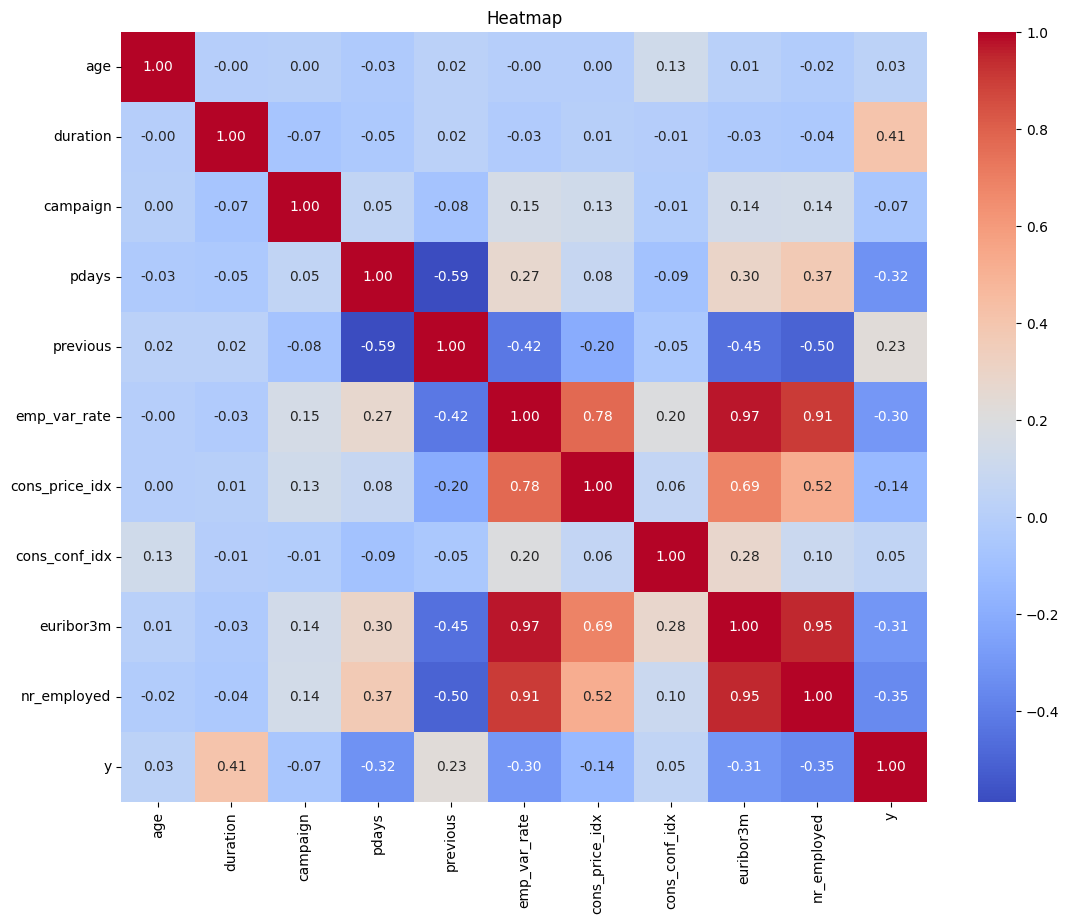

In [11]:
# Heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(corr,annot=True,fmt=".2f", cmap='coolwarm')
plt.title("Heatmap")
plt.show()

**Since variables are having high correlation values showing multicollinearity, lets plot regression line between them.**

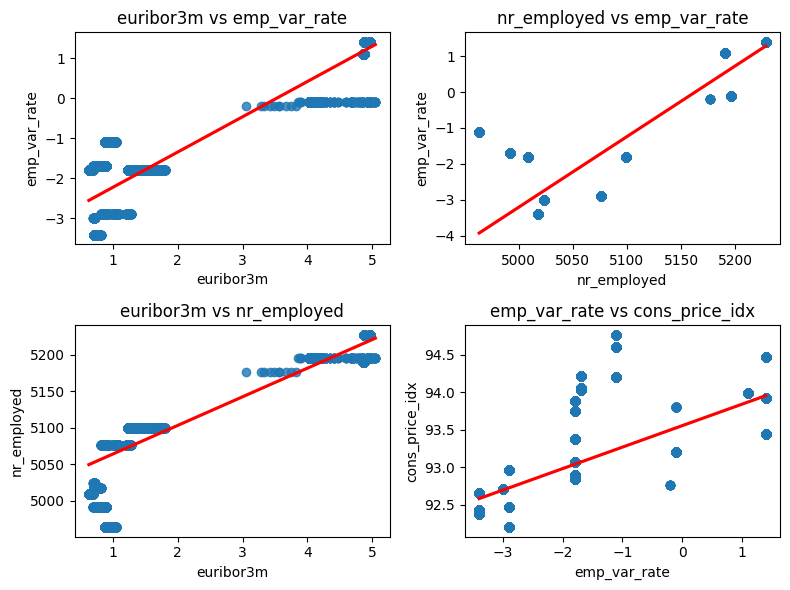

In [12]:
# Define pairs of variables for scatter plots with regression lines
plots = [
    ("euribor3m", "emp_var_rate"),
    ("nr_employed", "emp_var_rate"),
    ("euribor3m", "nr_employed"),
    ("emp_var_rate", "cons_price_idx")
]

# Plotting scatter plots with regression lines
plt.figure(figsize=(8, 6))

for i, (x, y) in enumerate(plots, 1):
    plt.subplot(2, 2, i)  # 2x2 grid of plots
    sns.regplot(x=x, y=y, data=data, line_kws={"color": "red"})
    plt.title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

### Multicollinearity Analysis and Variable Selection

Based on the multicollinearity analysis between the variables, the following pairs show high correlations:

- **euribor3m** and **emp_var_rate**: 0.972245
- **nr_employed** and **emp_var_rate**: 0.906970
- **euribor3m** and **nr_employed**: 0.945154

High multicollinearity can negatively impact the performance and interpretability of machine learning models. Therefore, it is advisable to remove one or more of the correlated variables before building the model.

#### Variable Selection Rationale:

- **nr_employed** has a higher correlation with the target variable (-0.35) compared to the other variables.
- To reduce multicollinearity and preserve the most relevant information, we will **keep `nr_employed`** and **remove `euribor3m` and `emp_var_rate`** from the dataset.

**Variables Pairplots**

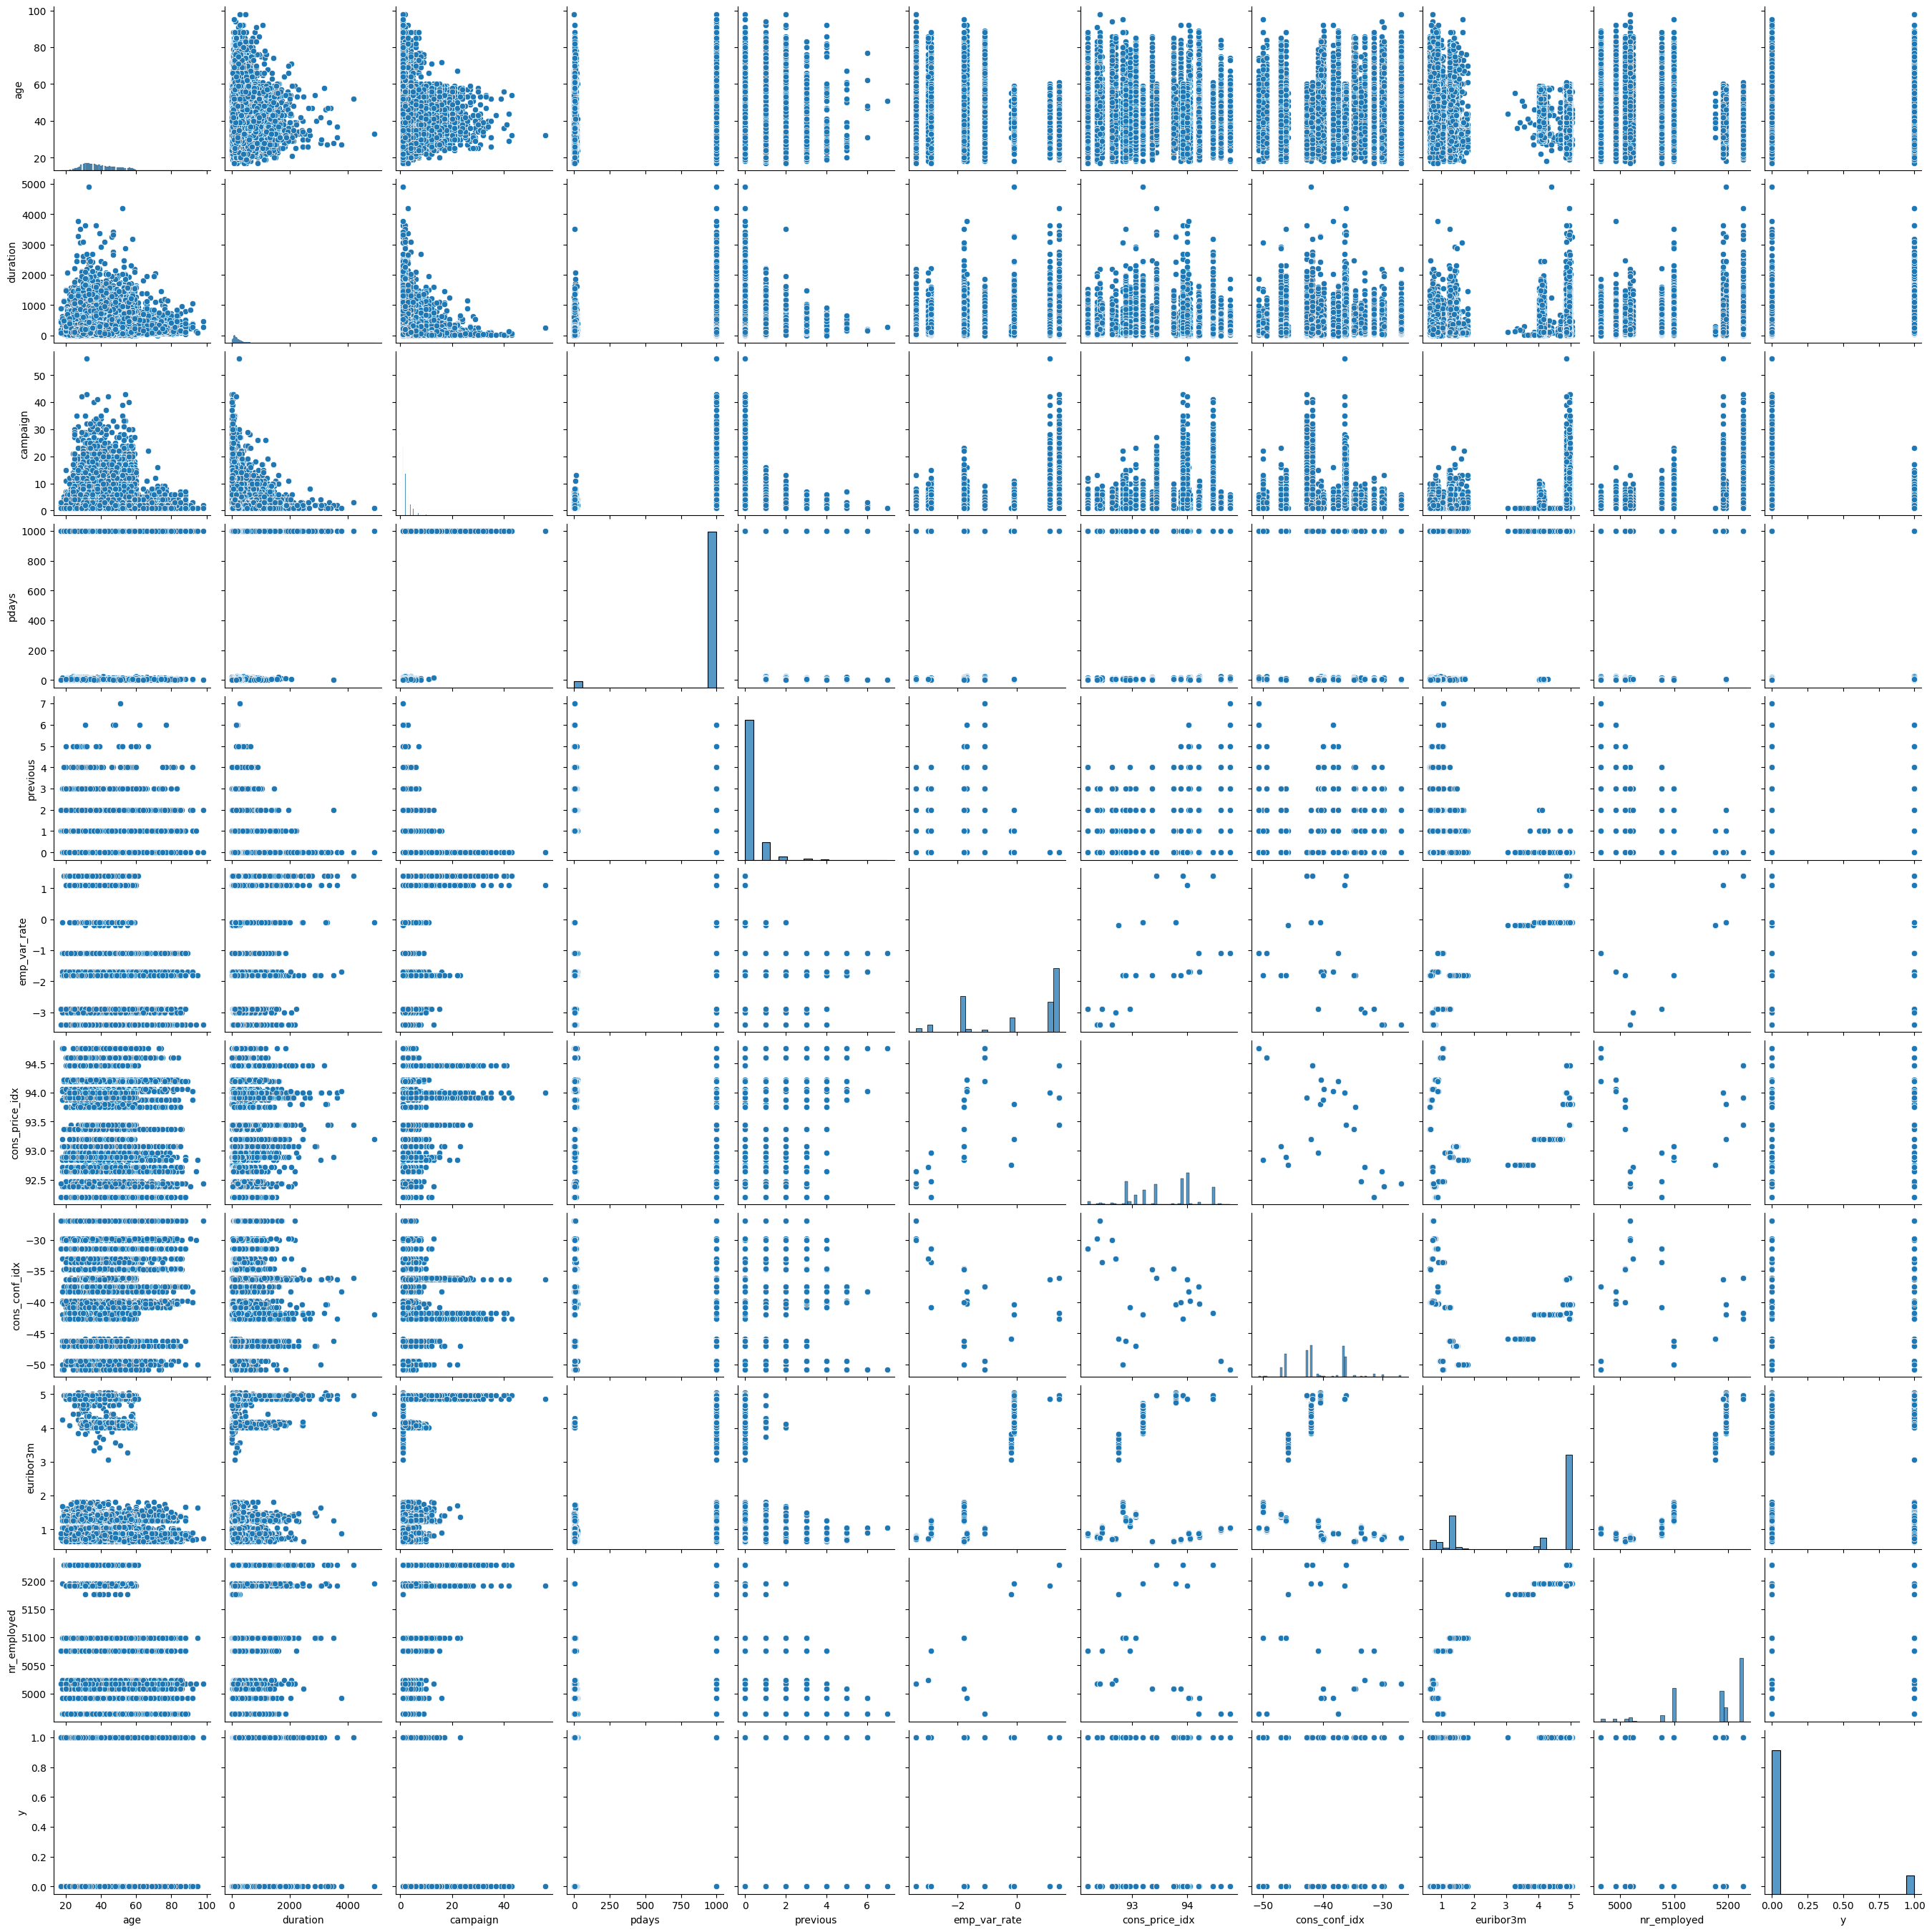

In [ ]:
# Pair plot for numerical features
sns.pairplot(numerical_df)
plt.show()

**Categorical Variables Analysis**

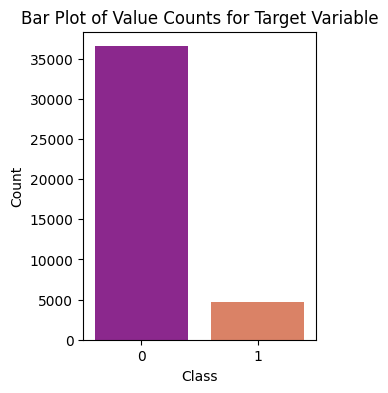

In [13]:
# Target variable count plot
plt.figure(figsize=(3, 4))
sns.barplot(x=data['y'].value_counts().index, y=data['y'].value_counts().values, palette='plasma')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts for Target Variable')
plt.show()

**Categorical Variables Count Plots**

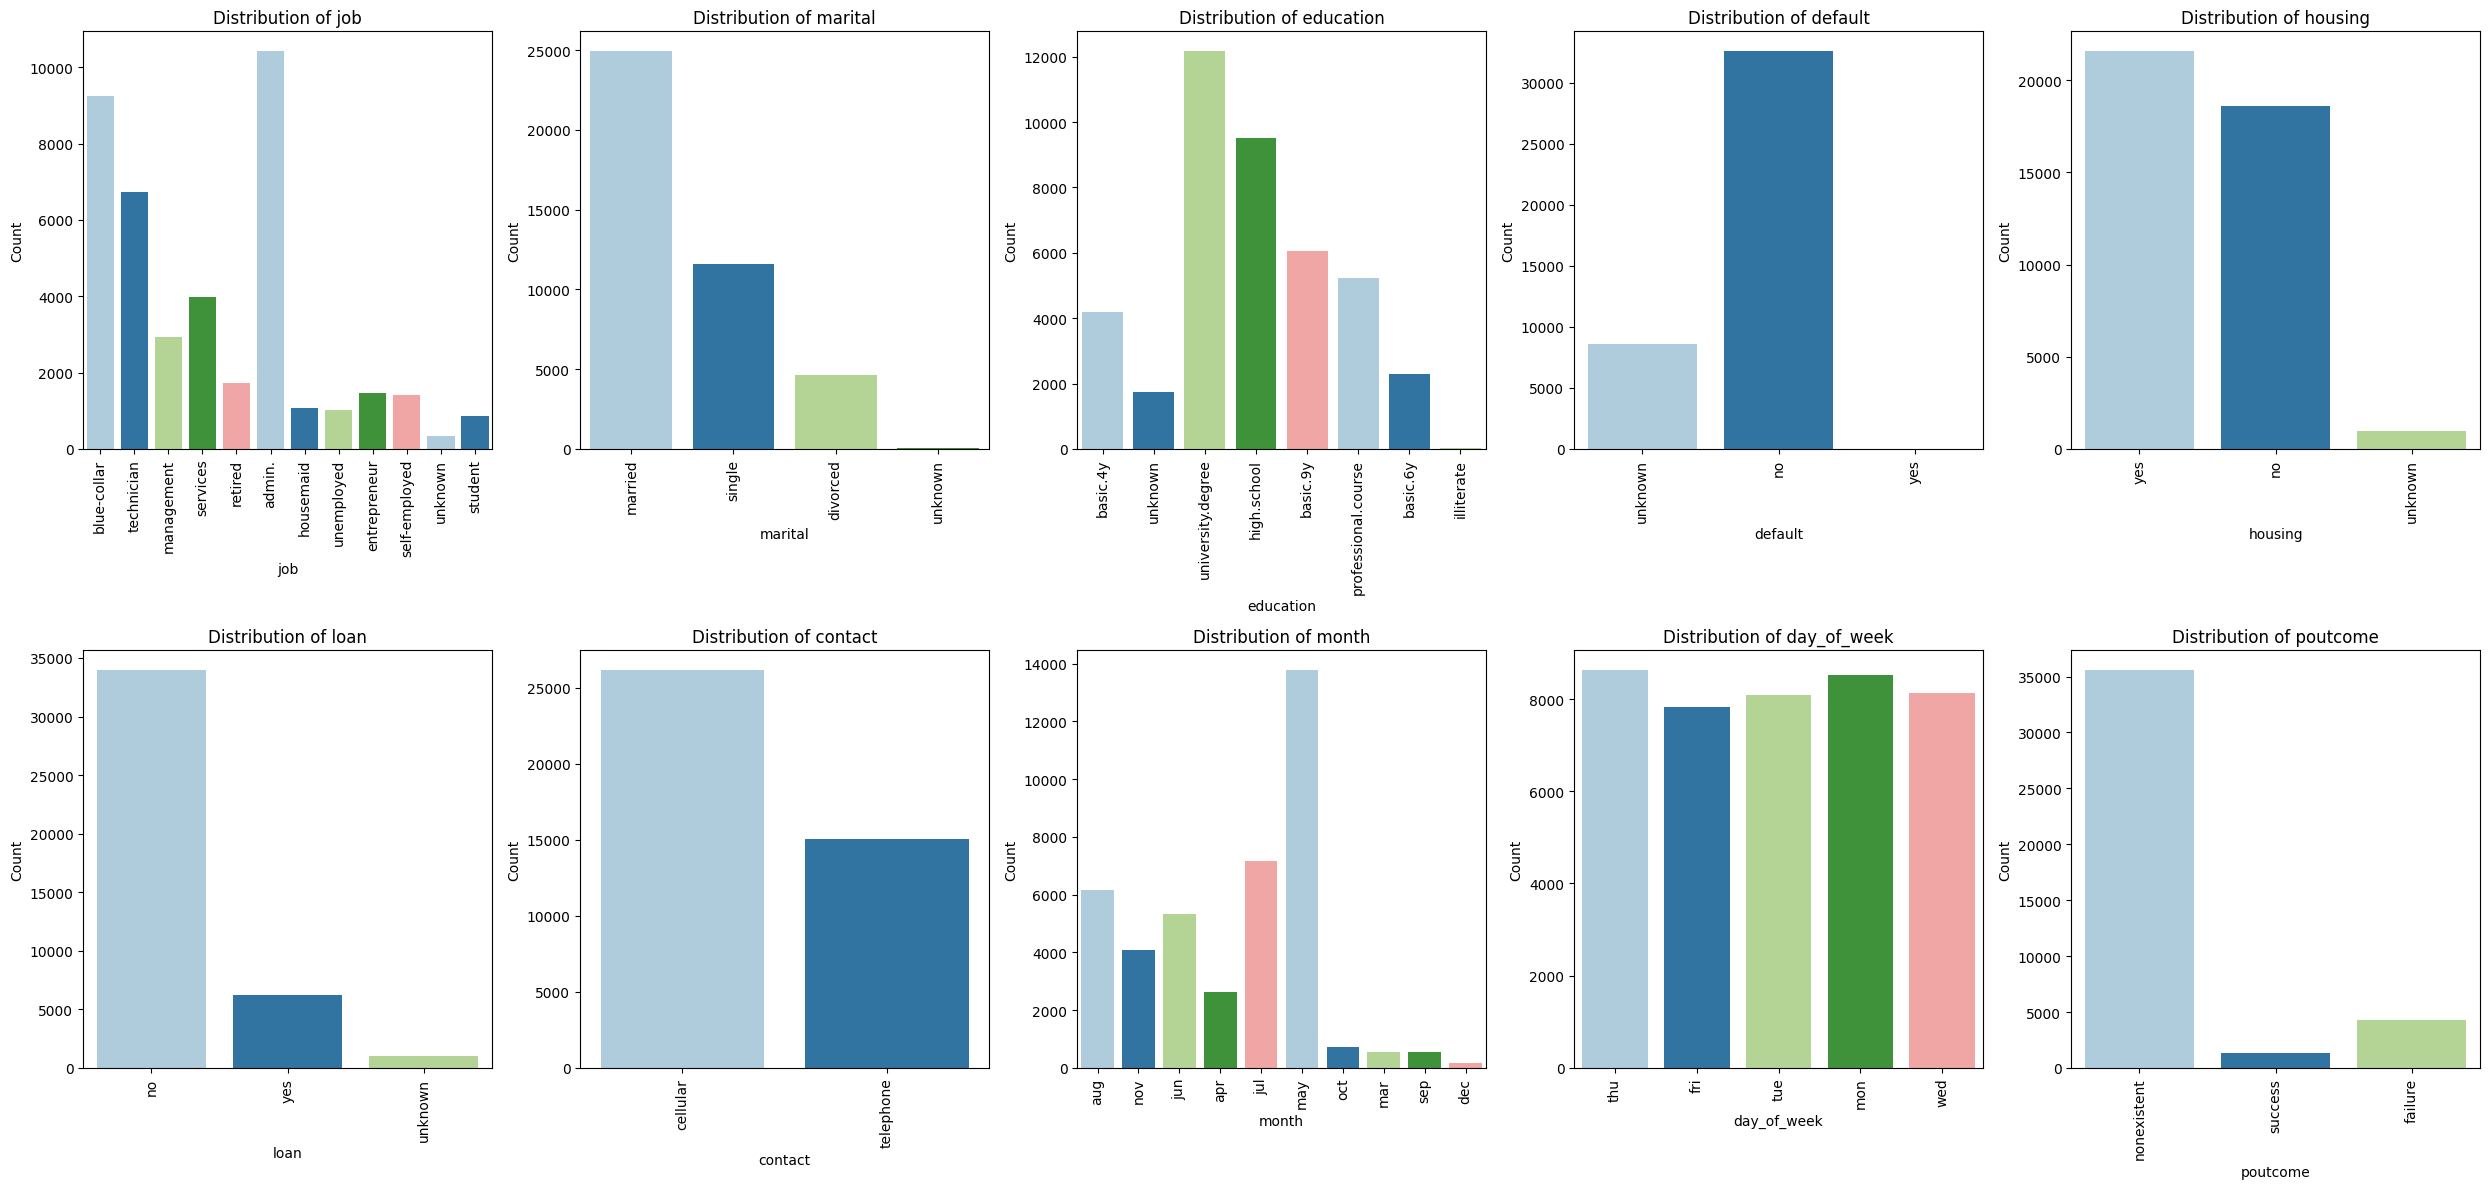

In [14]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category', 'bool']).columns

# Define a color palette
palette = sns.color_palette("Paired", 5)

# Plot bar graphs for each categorical column
num_plots = len(categorical_columns)
fig, axes = plt.subplots(2, 5, figsize=(25, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    # Get the unique categories for the column
    unique_categories = data[col].unique()
    # Generate a palette with the same number of colors as unique categories
    category_palette = sns.color_palette(palette, len(unique_categories))
    sns.countplot(data=data, x=col, ax=axes[i], palette=category_palette)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

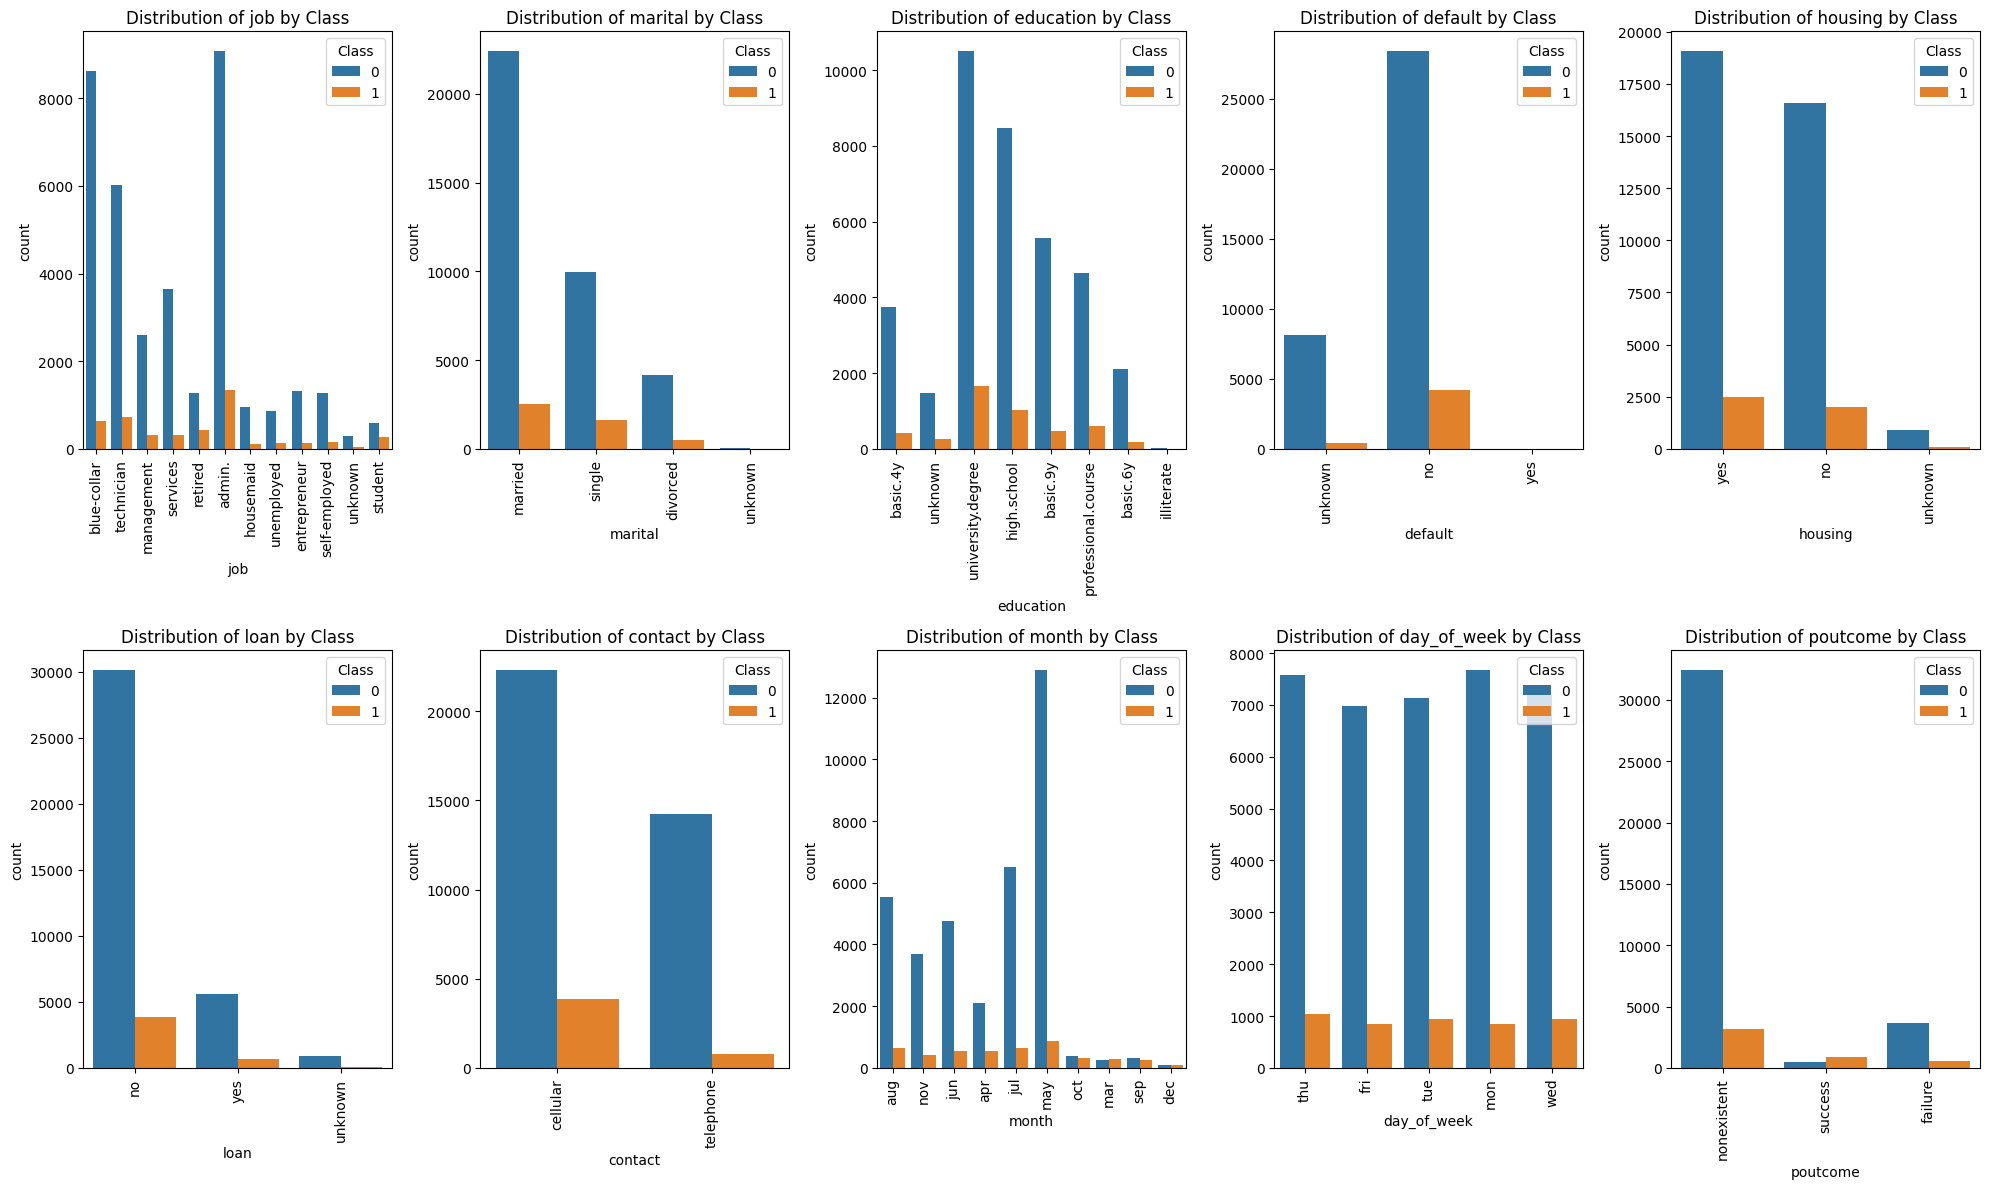

In [15]:
# Plot distribution of each categorical variable with respect to the class
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for idx, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='y', data=data, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column} by Class')
    axes[idx].legend(title='Class', loc='upper right')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [16]:
# Find value counts for the following variables
print(data['marital'].value_counts(), '\n')
print(data['default'].value_counts(), '\n')
print(data['loan'].value_counts(), '\n')


marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64 

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64 

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64 



### **Data Preperation for Model Building.**

**1) Drop duplicates values unnecessary columns** <br>
As discussed above to reduce multicollinearity, we will **keep `nr_employed`** and **remove `euribor3m` and `emp_var_rate`** from the dataset.

In [17]:
#Removing Duplicates
data.drop_duplicates()
data.shape

(41188, 21)

In [18]:
# Drop unnecessary columns
data = data.drop(columns=['euribor3m', 'emp_var_rate'])

**2) Data Encoding with Label Encoders.**

In [19]:
# Encoding categorical features using LabelEncoder
label_encoders = {}
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Dictionary to store encoders
encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Storing label encoders for future use if needed
    encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,210,1,999,0,1,93.444,-36.1,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,138,1,999,0,1,93.200,-42.0,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,339,3,6,2,2,94.055,-39.8,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,185,2,999,0,1,93.075,-47.1,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,137,1,3,1,2,92.201,-31.4,5076.2,1


In [20]:
# Display the encoded order
for feature, mapping in encoders.items():
    print(f"Encoding for {feature}: {mapping}")

Encoding for job: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Encoding for marital: {'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}
Encoding for education: {'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}
Encoding for default: {'no': 0, 'unknown': 1, 'yes': 2}
Encoding for housing: {'no': 0, 'unknown': 1, 'yes': 2}
Encoding for loan: {'no': 0, 'unknown': 1, 'yes': 2}
Encoding for contact: {'cellular': 0, 'telephone': 1}
Encoding for month: {'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
Encoding for day_of_week: {'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}
Encoding for poutcome: {'failure': 0, 'nonexistent': 1, 'success': 2}


**3) Separate features and target variable.**

In [21]:
X = data.drop(columns=['y'])
y = data['y']

**4) Scaling features with MinMaxScaler and StandardScaler for treating outliers.**

Since many of the features in the dataset do not follow a normal distribution and having many outliers, we are using MinMaxScaler for scaling the numerical variables. Also we are applying StandardScaler for building models that assume or prefer normally distributed data (e.g., SVM, Logistic Regression, KNN).

In [22]:
# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Define the features to scale
features_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons_price_idx', 'cons_conf_idx', 'nr_employed']

In [23]:
# Apply MinMaxScaler to numerical columns
X_minmax_scaled = X.copy()  # Create a copy of the dataframe for MinMax scaled version
X_minmax_scaled[features_to_scale] = minmax_scaler.fit_transform(X[features_to_scale])
X_minmax_scaled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,nr_employed
0,0.333333,1,1,0,1,2,0,0,1,2,0.042700,0.000000,1.000000,0.000000,1,0.484412,0.615063,1.000000
1,0.444444,9,1,7,0,0,0,0,7,0,0.028060,0.000000,1.000000,0.000000,1,0.389322,0.368201,0.877883
2,0.135802,4,2,6,0,2,0,0,4,2,0.068930,0.036364,0.006006,0.285714,2,0.722525,0.460251,0.105860
3,0.271605,7,1,3,0,0,0,0,0,0,0.037617,0.018182,1.000000,0.000000,1,0.340608,0.154812,0.512287
4,0.469136,5,1,0,0,2,0,0,1,0,0.027857,0.000000,0.003003,0.142857,2,0.000000,0.811715,0.425709


In [24]:
# Apply StandardScaler to numerical columns
X_standard_scaled = X.copy()  # Create a copy of the dataframe for Standard scaled version
X_standard_scaled[features_to_scale] = standard_scaler.fit_transform(X[features_to_scale])
X_standard_scaled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,nr_employed
0,0.381527,1,1,0,1,2,0,0,1,2,-0.186230,-0.565922,0.195414,-0.349494,1,-0.227465,0.951267,0.845170
1,1.245157,9,1,7,0,0,0,0,7,0,-0.463926,-0.565922,0.195414,-0.349494,1,-0.649003,-0.323542,0.398115
2,-1.153816,4,2,6,0,2,0,0,4,2,0.311309,0.156105,-5.117342,3.691766,2,0.828107,0.151810,-2.428157
3,-0.098268,7,1,3,0,0,0,0,0,0,-0.282652,-0.204909,0.195414,-0.349494,1,-0.864955,-1.425496,-0.940281
4,1.437075,5,1,0,0,2,0,0,1,0,-0.467783,-0.565922,-5.133393,1.671136,2,-2.374889,1.966794,-1.257233


**5) Splitting Data.**

In [25]:
# Using MinMax Scaled Data
X_train_minmax, X_test_minmax, y_train, y_test = train_test_split(X_minmax_scaled, y, test_size=0.2, random_state=42)
print(X_train_minmax.shape, X_test_minmax.shape, y_train.shape, y_test.shape)

(32950, 18) (8238, 18) (32950,) (8238,)


In [26]:
# Using Standard Scaled Data
X_train_standard, X_test_standard, y_train, y_test = train_test_split(X_standard_scaled, y, test_size=0.2, random_state=42)
print(X_train_standard.shape, X_test_standard.shape, y_train.shape, y_test.shape)

(32950, 18) (8238, 18) (32950,) (8238,)


### **Building  Machine Learning Models.**

In this analysis, we developed multiple classification models to predict whether a client will subscribe to a term deposit based on various personal characteristics, contact details, and economic indicators. The dataset was imbalanced, so we utilized different techniques like SMOTE (Synthetic Minority Oversampling Technique) and cost-sensitive learning to improve the performance of models. Here, we will compare several models and provide insights based on key evaluation metrics, focusing on **F1 Score** and **AUC** to determine the best model for deployment.

**Models Evaluated:**
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- XGBoost
- LightGBM
- K-Nearest Neighbors (KNN)

We will analyze the results before and after applying SMOTE and cost-sensitive learning.

**Creating some functions to build various models to classify the data.**

In [27]:
def models(clf, x_train, x_test, y_train, y_test, clf_name):
    """
    Trains the model, makes predictions, and evaluates performance.

    Parameters:
    - clf: The classifier model to train and evaluate.
    - clf_name: Name of the classifier for reporting purposes.

    Returns:
    - precision: Precision of the model.
    - recall: Recall of the model.
    - accuracy: Accuracy of the model.
    """
    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(x_test)

    # Calculate performance metrics
    precision, recall, accuracy = create_metrics(y_pred, clf_name, y_test)

    # Generate and display the ROC curve
    create_roc_curve(clf, clf_name, x_test, y_test)

    return precision, recall, accuracy

In [28]:
def create_roc_curve(clf, clf_name, x_test, y_test):
    """
    Generates and plots the ROC curve for the classifier.

    Parameters:
    - clf: The trained classifier model.
    - clf_name: Name of the classifier for labeling the plot.
    """
    # Predict probabilities for the positive class
    y_pred_prob = clf.predict_proba(x_test)[:, 1]

    # Compute ROC curve metrics
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
    auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{clf_name}, AUC={auc}")

In [29]:
def create_metrics(y_pred, clf_name, y_test):
    """
    Calculates and prints performance metrics of the model.

    Parameters:
    - y_pred: Predicted labels by the model.
    - clf_name: Name of the classifier for reporting purposes.
    - y_test: Actual target labels.

    Returns:
    - precision: Precision of the model.
    - recall: Recall of the model.
    - accuracy: Accuracy of the model.
    """
    # Calculate metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred) * 100, 2)

    # Print metrics and confusion matrix
    print("-" * 20, clf_name, "-" * 20)
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred), '\n')
    print(classification_report(y_test, y_pred))

    return precision, recall, accuracy

### Building Various Models on Imbalanced Dataset.

When dealing with imbalanced data, traditional metrics like accuracy can be misleading. Instead, consider the following metrics for a more informative evaluation:

- **Precision:** Measures the proportion of true positive predictions among all positive predictions made. It is crucial when the cost of false positives is high.

- **Recall (Sensitivity):** Indicates the proportion of actual positive cases that were correctly identified by the model. It is important when the cost of false negatives is high.

- **F1 Score:** The harmonic mean of precision and recall, providing a balanced measure of a model's performance, especially useful when you need to balance false positives and false negatives.

- **ROC-AUC (Receiver Operating Characteristic - Area Under Curve):** Evaluates the model’s ability to distinguish between classes. A higher AUC indicates better performance in class separation.

- **Confusion Matrix:** Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives, helping to understand the types of errors the model makes.

These metrics offer a comprehensive view of model performance, particularly for the minority class in imbalanced datasets.


-------------------- Logistic Regression --------------------
Confusion Matrix
[[7077  218]
 [ 549  394]] 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.64      0.42      0.51       943

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

-------------------- Random Forest --------------------
Confusion Matrix
[[7009  286]
 [ 462  481]] 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7295
           1       0.63      0.51      0.56       943

    accuracy                           0.91      8238
   macro avg       0.78      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238

-------------------- SVM --------------------
Confusion Matrix
[[7135  160]
 [ 619  324]] 

              precision    recall  f1-score 

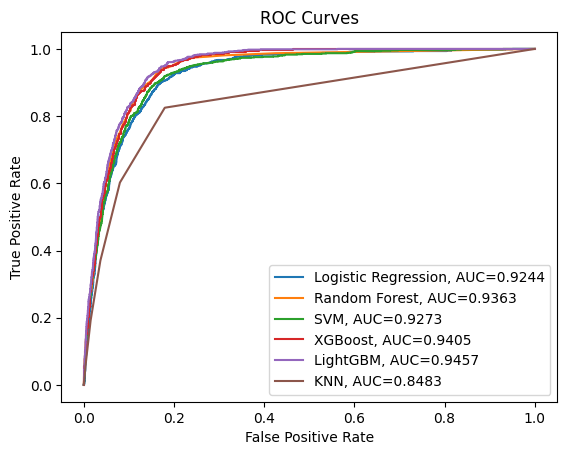

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
precision_lr, recall_lr, accuracy_lr = models(log_reg, X_train_standard, X_test_standard, y_train, y_test, 'Logistic Regression')

# Random Forest
random_forest = RandomForestClassifier()
precision_rf, recall_rf, accuracy_rf = models(random_forest, X_train_minmax, X_test_minmax, y_train, y_test, 'Random Forest')

# Support Vector Machine (SVM)
svm = SVC(probability=True)
precision_svm, recall_svm, accuracy_svm = models(svm, X_train_standard, X_test_standard, y_train, y_test, 'SVM')

# XGBoost
xgboost = xgb.XGBClassifier()
precision_xgb, recall_xgb, accuracy_xgb = models(xgboost, X_train_minmax, X_test_minmax, y_train, y_test, 'XGBoost')

# LightGBM
lgbm = LGBMClassifier()
precision_lgbm, recall_lgbm, accuracy_lgbm = models(lgbm, X_train_minmax, X_test_minmax, y_train, y_test, 'LightGBM')

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
precision_knn, recall_knn, accuracy_knn = models(knn, X_train_standard, X_test_standard, y_train, y_test, 'KNN')

# Show plot of ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Get the feature importances
feature_importances = random_forest.feature_importances_

In [ ]:
# Create a DataFrame for better visualization
features = X.columns  # Assuming X is a DataFrame. If it's a NumPy array, use range(X.shape[1])
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

In [ ]:
# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

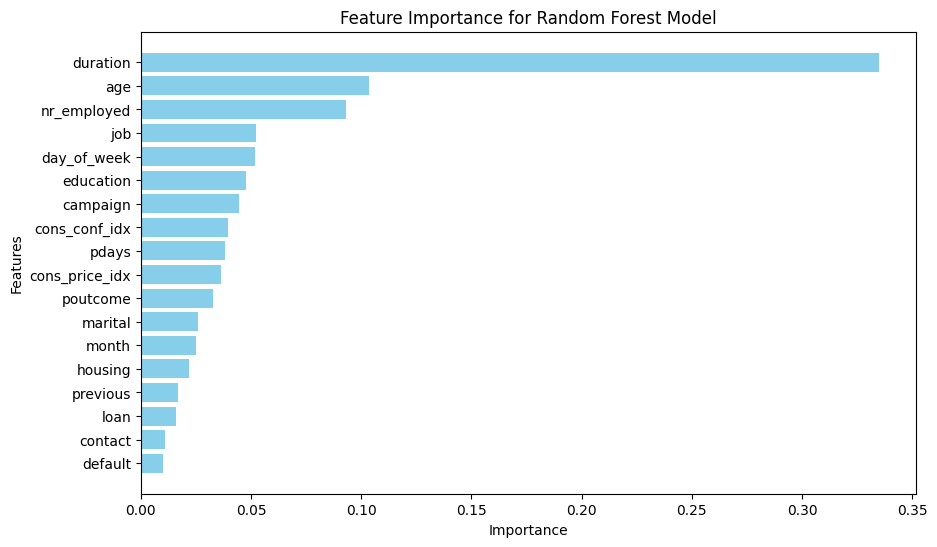

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
# Set a threshold to remove least important features
threshold = 0.01
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

In [ ]:
# Create a new dataset with only the important features
X_train_important = X_train_minmax[important_features]
X_test_important = X_test_minmax[important_features]

-------------------- Random Forest --------------------
Confusion Matrix
[[7005  290]
 [ 445  498]] 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7295
           1       0.63      0.53      0.58       943

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



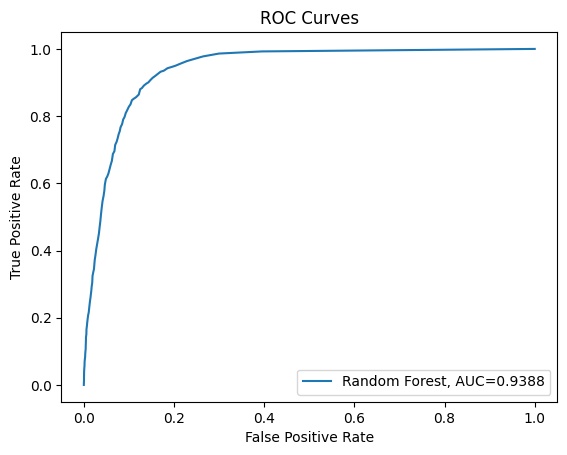

In [ ]:
# Train a new Random Forest model on the reduced dataset
rf_model_reduced = RandomForestClassifier(random_state=42)
precision_rf, recall_rf, accuracy_rf = models(rf_model_reduced, X_train_important, X_test_important, y_train, y_test, 'Random Forest')


# Show plot of ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

#### Insights about Various Models on Imbalanced Dataset
- **AUC**: The highest AUC score was achieved by **LightGBM (0.9457)**, followed closely by **XGBoost (0.9405)**. These models performed well in distinguishing between the classes.
- **F1-Score**: LightGBM had the highest **F1-score (0.60)**, indicating a good balance between precision and recall for classifying the minority class (class 1). XGBoost also performed well with an F1-score of **0.58**.
- **Precision and Recall**: LightGBM achieved the best balance between precision (0.65) and recall (0.56), making it more reliable in predicting class 1 compared to other models.
- **KNN** had the lowest performance overall with the lowest AUC and F1-score, indicating that this model is not well-suited for this particular problem.
- **Random Forest** model built after romoving least important features from the data (threshold = 0.01) improved F1 score and AUC.

## **Balancing Data**

Balancing data is crucial for effective machine learning models, especially when dealing with imbalanced datasets where some classes are underrepresented. This imbalance can lead to biased models and poor performance on the minority class.

**Several Methods for Balancing Data:**

1. **Random Over-Sampling (ROS):** Duplicates minority class samples. Simple but may lead to overfitting.
2. **SMOTE (Synthetic Minority Over-sampling Technique):** Generates synthetic samples by interpolating between existing samples. Helps in reducing overfitting and creating a more diverse dataset.
3. **ADASYN (Adaptive Synthetic Sampling):** Similar to SMOTE but focuses on harder-to-classify samples.
4. **Random Under-Sampling:** Reduces the number of majority class samples to balance the dataset. Simple but may lose valuable information.

For this project, we have used combination of Random Under-Sampling and  SMOTE to balance our data, which helps improve model performance by generating new, plausible samples.

In [ ]:
# First, undersample the majority class to 20,000
undersample = RandomUnderSampler(sampling_strategy={0: 15000}, random_state=42)
X_under_minmax, y_under_minmax = undersample.fit_resample(X_train_minmax, y_train)
X_under_standard, y_under_standard = undersample.fit_resample(X_train_standard, y_train)

# Initialize SMOTE
smote = SMOTE(sampling_strategy={1: 15000}, random_state=42)

# Apply SMOTE to MinMax scaled training data
X_train_minmax_smote, y_train_minmax_smote = smote.fit_resample(X_under_minmax, y_under_minmax)

# Apply SMOTE to Standard scaled training data
X_train_standard_smote, y_train_standard_smote = smote.fit_resample(X_under_standard, y_under_standard)

print(X_train_minmax_smote.shape, y_train_minmax_smote.shape)

(30000, 18) (30000,)


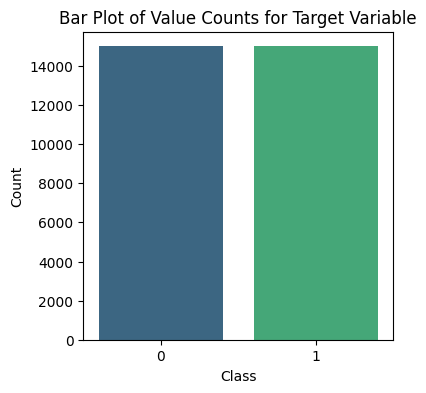

In [ ]:
# Plot the value counts of the resampled target variable
plt.figure(figsize=(4, 4))
sns.barplot(x=y_train_minmax_smote.value_counts().index, y=y_train_minmax_smote.value_counts().values, palette="viridis")
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts for Target Variable')
plt.show()

### Building Various Models using the Resampled Data.

-------------------- Logistic Regression --------------------
Confusion Matrix
[[6225 1070]
 [ 141  802]] 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7295
           1       0.43      0.85      0.57       943

    accuracy                           0.85      8238
   macro avg       0.70      0.85      0.74      8238
weighted avg       0.91      0.85      0.87      8238

-------------------- Random Forest --------------------
Confusion Matrix
[[6540  755]
 [ 173  770]] 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7295
           1       0.50      0.82      0.62       943

    accuracy                           0.89      8238
   macro avg       0.74      0.86      0.78      8238
weighted avg       0.92      0.89      0.90      8238

-------------------- SVM --------------------
Confusion Matrix
[[6110 1185]
 [ 101  842]] 

              precision    recall  f1-score 

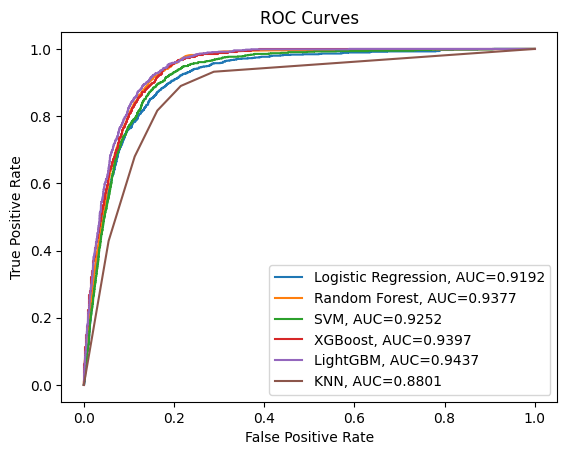

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
precision_lr, recall_lr, accuracy_lr = models(log_reg, X_train_standard_smote, X_test_standard, y_train_standard_smote, y_test, 'Logistic Regression')

# Random Forest
random_forest = RandomForestClassifier()
precision_rf, recall_rf, accuracy_rf = models(random_forest, X_train_minmax_smote, X_test_minmax, y_train_minmax_smote, y_test, 'Random Forest')

# Support Vector Machine (SVM)
svm = SVC(probability=True)
precision_svm, recall_svm, accuracy_svm = models(svm, X_train_standard_smote, X_test_standard, y_train_standard_smote, y_test, 'SVM')

# XGBoost
xgboost = xgb.XGBClassifier()
precision_xgb, recall_xgb, accuracy_xgb = models(xgboost, X_train_minmax_smote, X_test_minmax, y_train_minmax_smote, y_test, 'XGBoost')

# LightGBM
lgbm = LGBMClassifier()
precision_lgbm, recall_lgbm, accuracy_lgbm = models(lgbm, X_train_minmax_smote, X_test_minmax, y_train_minmax_smote, y_test, 'LightGBM')

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
precision_knn, recall_knn, accuracy_knn = models(knn, X_train_standard_smote, X_test_standard, y_train_standard_smote, y_test, 'KNN')

# Step 3: Show plot of ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

#### Insights After Resampling
- **Resampling with SMOTE and Under-Sampling** significantly improved the recall for the minority class across all models. For instance, SVM's recall jumped to **0.89**, and **Random Forest** and **LightGBM** showed significant improvements in recall.
- **XGBoost** and **LightGBM** still performed the best overall, with **LightGBM** leading in terms of AUC (**0.9437**) and **XGBoost** showing slightly better precision (**0.53**).
- **Random Forest** after resampling achieved a balanced performance between recall and precision.

### Building Various Models using Cost-Sensitive Learning

The goal of our model is to improve the bank’s marketing strategy. This requires focusing on clients who are most likely to subscribe to the term deposit. If the model is overly focused on minimizing overall error, it may fail to identify these clients correctly, leading to inefficient marketing and lost revenue.

Cost-sensitive learning ensures that the model takes into account the higher cost associated with misclassifying the minority class, improving recall for subscribing clients.

**Class Weighting:** Many machine learning algorithms (like Logistic Regression, Decision Trees, Random Forests, SVM, etc.) allow you to adjust the class_weight parameter to penalize the minority class more heavily. This can help the model pay more attention to predicting "yes" cases.

-------------------- Logistic Regression --------------------
Confusion Matrix
[[6177 1118]
 [ 110  833]] 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7295
           1       0.43      0.88      0.58       943

    accuracy                           0.85      8238
   macro avg       0.70      0.87      0.74      8238
weighted avg       0.92      0.85      0.87      8238

-------------------- Random Forest --------------------
Confusion Matrix
[[7058  237]
 [ 523  420]] 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.64      0.45      0.53       943

    accuracy                           0.91      8238
   macro avg       0.79      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238

-------------------- SVM --------------------
Confusion Matrix
[[6010 1285]
 [  74  869]] 

              precision    recall  f1-score 

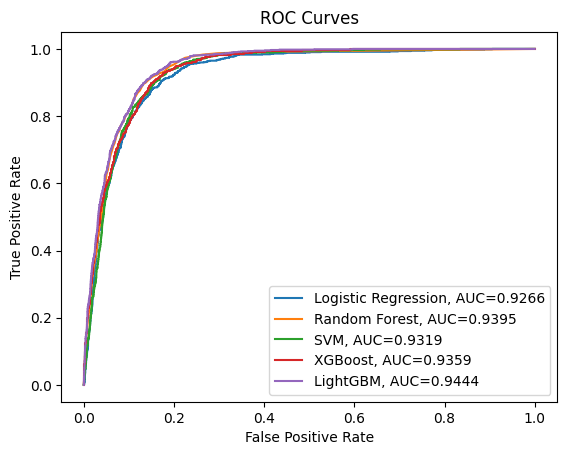

In [ ]:
# Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
precision_lr, recall_lr, accuracy_lr = models(log_reg, X_train_standard, X_test_standard, y_train, y_test, 'Logistic Regression')

# Random Forest with class weights
random_forest = RandomForestClassifier(class_weight='balanced')
precision_rf, recall_rf, accuracy_rf = models(random_forest, X_train_minmax, X_test_minmax, y_train, y_test, 'Random Forest')

# Support Vector Machine (SVM) with class weights
svm = SVC(class_weight='balanced', probability=True)
precision_svm, recall_svm, accuracy_svm = models(svm, X_train_standard, X_test_standard, y_train, y_test, 'SVM')

# XGBoost with scale_pos_weight
# Calculate scale_pos_weight
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
xgboost = xgb.XGBClassifier(scale_pos_weight=pos_weight)
precision_xgb, recall_xgb, accuracy_xgb = models(xgboost, X_train_minmax, X_test_minmax, y_train, y_test, 'XGBoost')

# LightGBM with class_weight
lgbm = LGBMClassifier(class_weight='balanced')
precision_lgbm, recall_lgbm, accuracy_lgbm = models(lgbm, X_train_minmax, X_test_minmax, y_train, y_test, 'LightGBM')

# Step 3: Show plot of ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

#### Insights models after applying cost-sensitive learning


   - **LightGBM** has the highest AUC (0.9357), indicating the best overall ability to discriminate between classes. It consistently ranks high across various metrics, making it a strong candidate for deployment.
   - **SVM** follows closely with an AUC of 0.9312, reflecting strong performance in distinguishing between the classes.
   - **LightGBM** also leads in the F1-Score (0.61), suggesting it performs well in balancing precision and recall for the minority class.
   - **XGBoost** and **Random Forest** follow with F1-Scores of 0.60 and 0.53, respectively. These models show moderate performance in handling the imbalanced data.
   - **Random Forest** has the highest accuracy (0.91), showing it overall classifies correctly. However, in imbalanced datasets, accuracy alone can be misleading as it does not account for class imbalance.

### Applying Cost-Sensitive Learning to the data after PCA

Principal Component Analysis (PCA) can improve model performance by reducing the dimensionality of the data while retaining most of its variance. This transformation can help address issues like multicollinearity, noise, and overfitting, which may occur in high-dimensional datasets. By projecting the data onto a lower-dimensional subspace, PCA simplifies the model, making it easier to capture the underlying patterns and relationships. This can lead to more efficient training, faster computation, and potentially better generalization to unseen data, thereby improving the model's performance.

In [ ]:
# Set the number of components
n_components = 0.95

In [ ]:
# Apply PCA on StandardScaled Data (after train-test split)
pca_standard = PCA(n_components=n_components)
X_train_standard_pca = pca_standard.fit_transform(X_train_standard)
X_test_standard_pca = pca_standard.transform(X_test_standard)

# Check the explained variance ratio for both PCA transformations
print("Explained Variance Ratio (Standard Scaled Data):\n", pca_standard.explained_variance_ratio_)

# Display the number of components after applying PCA
print(f"Number of components chosen for Standard Scaled Data: {pca_standard.n_components_}")

Explained Variance Ratio (Standard Scaled Data):
 [0.37119427 0.159634   0.12523251 0.06090097 0.05594633 0.03602961
 0.03064583 0.02944917 0.02698162 0.02585218 0.02325778 0.01483592]
Number of components chosen for Standard Scaled Data: 12


-------------------- Logistic Regression --------------------
Confusion Matrix
[[6116 1179]
 [ 139  804]] 

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7295
           1       0.41      0.85      0.55       943

    accuracy                           0.84      8238
   macro avg       0.69      0.85      0.73      8238
weighted avg       0.91      0.84      0.86      8238

-------------------- Random Forest --------------------
Confusion Matrix
[[7078  217]
 [ 577  366]] 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7295
           1       0.63      0.39      0.48       943

    accuracy                           0.90      8238
   macro avg       0.78      0.68      0.71      8238
weighted avg       0.89      0.90      0.89      8238

-------------------- SVM --------------------
Confusion Matrix
[[6023 1272]
 [  73  870]] 

              precision    recall  f1-score 

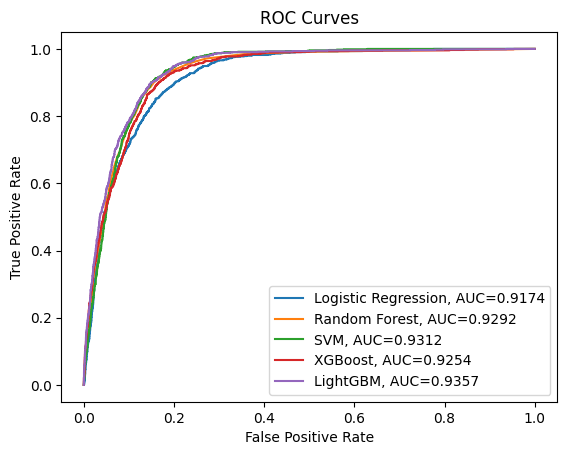

In [ ]:
# Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
precision_lr, recall_lr, accuracy_lr = models(log_reg, X_train_standard_pca, X_test_standard_pca, y_train, y_test, 'Logistic Regression')

# Random Forest with class weights
random_forest = RandomForestClassifier(class_weight='balanced')
precision_rf, recall_rf, accuracy_rf = models(random_forest, X_train_standard_pca, X_test_standard_pca, y_train, y_test, 'Random Forest')

# Support Vector Machine (SVM) with class weights
svm = SVC(class_weight='balanced', probability=True)
precision_svm, recall_svm, accuracy_svm = models(svm, X_train_standard_pca, X_test_standard_pca, y_train, y_test, 'SVM')

# XGBoost with scale_pos_weight
# Calculate scale_pos_weight
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
xgboost = xgb.XGBClassifier(scale_pos_weight=pos_weight)
precision_xgb, recall_xgb, accuracy_xgb = models(xgboost, X_train_standard_pca, X_test_standard_pca, y_train, y_test, 'XGBoost')

# LightGBM with class_weight
lgbm = LGBMClassifier(class_weight='balanced')
precision_lgbm, recall_lgbm, accuracy_lgbm = models(lgbm, X_train_standard_pca, X_test_standard_pca, y_train, y_test, 'LightGBM')

# Step 3: Show plot of ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

#### Insights

The models built after applying PCA with cost-sensitive learning does not show any improvements in the model model performace. Hence we are not condidering these models for further process.

### **Hyperparameter Tuning**

Hyperparameter tuning is critical in this classification problem as it helps optimize the performance of machine learning models by adjusting parameters that control the model's learning process. For example, in models like Random Forests, hyperparameters like `max_depth` and `min_samples_split` influence the complexity of the model, preventing overfitting or underfitting. In models like XGBoost and LightGBM, hyperparameters such as `learning_rate`, `n_estimators`, and `scale_pos_weight` can significantly impact the model’s ability to handle class imbalance and improve its ability to correctly predict clients who are likely to subscribe to a term deposit.

Tuning these hyperparameters ensures that the model generalizes well to unseen data, balances the trade-off between bias and variance, and addresses the challenge of class imbalance in the dataset. Properly tuned models can better identify the minority class (clients subscribing) while avoiding unnecessary predictions for the majority class (clients not subscribing), leading to a more effective and accurate marketing strategy.








In [ ]:
# Define the hyperparameters for each model
# Logistic Regression
param_log_reg = {
    "C": [100, 10, 1.0, 0.1, 0.01],
    "penalty": ["l2"],
    "solver": ['newton-cg', 'liblinear'],
    "max_iter": [1000]
}

# Random Forest
param_rf = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000]
}

# SVM
param_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# XGBoost
xgb_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

# LightGBM
lgb_param_grid = {
    'num_leaves': [31, 62],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

# KNN
param_knn = {
    'n_neighbors': [1, 3, 5, 7],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
# Function to train model, calculate metrics, and plot ROC curve
def models(clf, param_grid, x_train, x_test, y_train, y_test, clf_name):
    """
    Applies grid search, trains the model with best parameters, evaluates, and generates ROC curve.
    """
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # Identifying best estimator
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(x_test)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    precision, recall, accuracy = create_metrics(y_pred, clf_name, y_test, best_params)

    create_roc_curve(best_clf, clf_name, x_test, y_test)

    return precision, recall, accuracy

In [ ]:
# Function to generate and plot the ROC curve
def create_roc_curve(clf, clf_name, x_test, y_test):
    """
    Generates and plots the ROC curve for the classifier.
    """
    if hasattr(clf, "predict_proba"):  # Logistic Regression, Random Forest, XGBoost, LightGBM, KNN
        y_pred_prob = clf.predict_proba(x_test)[:, 1]
    else:  # SVM
        y_pred_prob = clf.decision_function(x_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{clf_name}, AUC={round(auc, 4)}")

In [ ]:
# Function to create metrics
def create_metrics(y_pred, clf_name, y_test, best_params):
    """
    Calculates and prints performance metrics of the model.
    """
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred) * 100, 2)

    print("-" * 20, clf_name, "-" * 20, '\n')
    print("Best hyperparameters found:", best_params, '\n')
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred), '\n')
    print(classification_report(y_test, y_pred))

    return precision, recall, accuracy

-------------------- Logistic Regression -------------------- 

Best hyperparameters found: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'} 

Confusion Matrix
[[6176 1119]
 [ 110  833]] 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7295
           1       0.43      0.88      0.58       943

    accuracy                           0.85      8238
   macro avg       0.70      0.86      0.74      8238
weighted avg       0.92      0.85      0.87      8238

-------------------- KNN -------------------- 

Best hyperparameters found: {'metric': 'manhattan', 'n_neighbors': 7} 

Confusion Matrix
[[7082  213]
 [ 631  312]] 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7295
           1       0.59      0.33      0.43       943

    accuracy                           0.90      8238
   macro avg       0.76      0.65      0.68      8238
weighted avg       0.88   

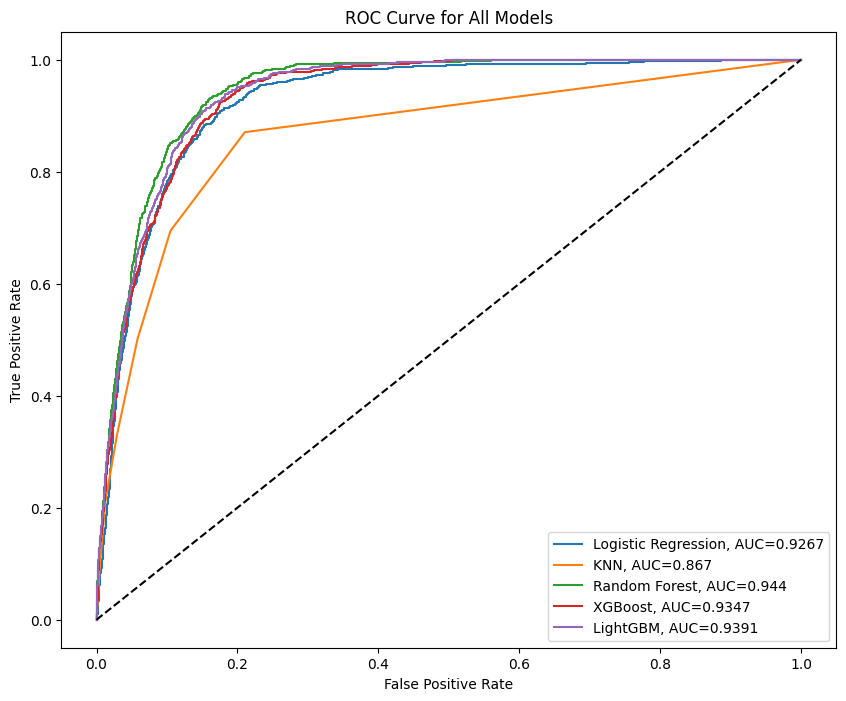

In [ ]:
# Initialize models and their respective hyperparameters
model_hyperparams_1 = [
    (LogisticRegression(class_weight='balanced'), param_log_reg, 'Logistic Regression'),
    (KNeighborsClassifier(), param_knn, 'KNN')
]

model_hyperparams_2 = [
    (RandomForestClassifier(class_weight='balanced'), param_rf, 'Random Forest'),
    (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=pos_weight), xgb_param_grid, 'XGBoost'),
    (LGBMClassifier(class_weight='balanced'), lgb_param_grid, 'LightGBM')
]

# Plot ROC curve for all models
plt.figure(figsize=(10, 8))

# Loop over each model and apply the grid search
for clf, param_grid, clf_name in model_hyperparams_1:
    models(clf, param_grid, X_train_standard, X_test_standard, y_train, y_test, clf_name)

# Loop over each model and apply the grid search
for clf, param_grid, clf_name in model_hyperparams_2:
    models(clf, param_grid, X_train_minmax, X_test_minmax, y_train, y_test, clf_name)

# Final plot adjustments
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='best')
plt.show()

#### Insights

1. **AUC (Area Under the Curve) Analysis:**
   - **Best AUC:** Random Forest (0.9440), followed closely by LightGBM (0.9391). These models demonstrate the highest ability to distinguish between the positive and negative classes.
   - **Lowest AUC:** KNN (0.8670), indicating it has the least ability to separate the classes effectively compared to others.

2. **Precision, Recall, and F1-Score:**
   - **Precision (Class 1):** KNN has the highest precision for Class 1 (0.59), meaning it has fewer false positives for the positive class compared to other models.
   - **Recall (Class 1):** Logistic Regression (0.88) and LightGBM (0.84) have the highest recall for Class 1, showing they can identify a higher proportion of actual positives.
   - **F1-Score (Class 1):** Random Forest and LightGBM have the highest F1-Score for Class 1 (0.64 and 0.62 respectively), balancing precision and recall effectively.

3. **Accuracy:**
   - **Highest Accuracy:** KNN (0.90), which may indicate it performs well overall but does not necessarily reflect its performance on the minority class due to the imbalance.


### Neural Networks

Neural networks are useful for the term deposit subscription problem due to their ability to model complex relationships in the data. They excel at capturing non-linear patterns and interactions between features, which can be particularly valuable when dealing with diverse and intricate datasets. With multiple layers and neurons, neural networks can learn intricate representations of the data that simpler models might miss, leading to improved predictive accuracy for both the majority and minority classes.

Additionally, neural networks are well-suited for handling large datasets and can be tuned to focus on the minority class through techniques like dropout, regularization, and adjusting class weights. This makes them effective in addressing class imbalance and enhancing the model's performance in identifying clients who are likely to subscribe to a term deposit.


**Feed-Forward Neural Network (Basic Model)**

Since the data is imbalanced we have considered F1 score for matrics.

In [ ]:
from tensorflow.keras import backend as K

# Define custom F1 metric
def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)  # Round predictions to 0 or 1
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)  # True positives
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)  # False positives
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)  # False negatives

    precision = tp / (tp + fp + K.epsilon())  # Precision calculation
    recall = tp / (tp + fn + K.epsilon())  # Recall calculation

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())  # F1 score
    return K.mean(f1)

# Define the model
model = Sequential()

# Input layer (you may adjust input_dim based on your number of features)
model.add(Dense(64, input_dim=X_train_minmax.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (binary classification, use 'sigmoid' activation)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with custom F1 metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[f1_score])

# Compute class weights to handle the class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the model
model.fit(X_train_minmax, y_train, epochs=20, batch_size=32, validation_data=(X_test_minmax, y_test), class_weight=class_weight_dict)

Epoch 1/20
1030/1030 [==============================] - 7s 5ms/step - loss: 0.5269 - f1_score: 0.3902 - val_loss: 0.4637 - val_f1_score: 0.4931
Epoch 2/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.3942 - f1_score: 0.5039 - val_loss: 0.3882 - val_f1_score: 0.5236
Epoch 3/20
1030/1030 [==============================] - 3s 3ms/step - loss: 0.3554 - f1_score: 0.5220 - val_loss: 0.2737 - val_f1_score: 0.5712
Epoch 4/20
1030/1030 [==============================] - 3s 3ms/step - loss: 0.3451 - f1_score: 0.5251 - val_loss: 0.2923 - val_f1_score: 0.5725
Epoch 5/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.3405 - f1_score: 0.5265 - val_loss: 0.3881 - val_f1_score: 0.5182
Epoch 6/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.3360 - f1_score: 0.5216 - val_loss: 0.5128 - val_f1_score: 0.4694
Epoch 7/20
1030/1030 [==============================] - 3s 3ms/step - loss: 0.3355 - f1_score: 0.5227 - val_loss: 0.2922 - val_f1_score:

258/258 [==============================] - 1s 2ms/step
[[6386  909]
 [ 159  784]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      7295
           1       0.46      0.83      0.59       943

    accuracy                           0.87      8238
   macro avg       0.72      0.85      0.76      8238
weighted avg       0.92      0.87      0.89      8238



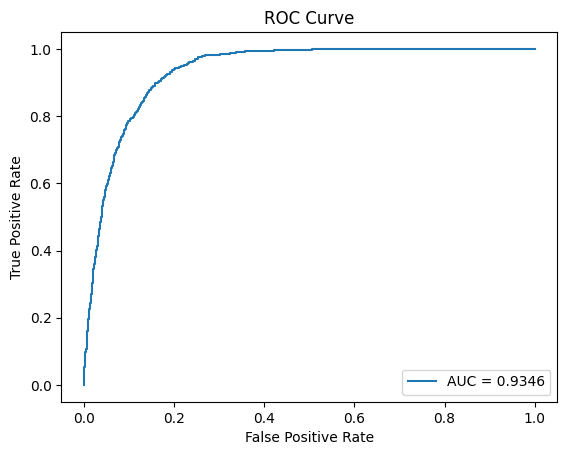

In [ ]:
# Evaluate the model
y_pred_prob = model.predict(X_test_minmax)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="AUC = {:.4f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### **Neural Network Hyperparameter Tuning with RandomizedSearchCV**

In [ ]:
# Define the function to create the model (needed for KerasClassifier)
def create_model(optimizer='adam', init='glorot_uniform', neurons=64, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_minmax.shape[1], kernel_initializer=init, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
# Define the hyperparameter grid
param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30, 40],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': ['relu', 'tanh'],
    'init': ['glorot_uniform', 'normal', 'uniform']
}

In [ ]:
# Compute class weights to handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [ ]:
# Perform Randomized Search with AUC Scoring
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_result = random_search.fit(X_train_minmax, y_train, class_weight=class_weight_dict)

# Print the best parameters and score
print("Best Score: ", random_result.best_score_)
print("Best Hyperparameters: ", random_result.best_params_)

Best Score:  0.5826466398597168
Best Hyperparameters:  {'optimizer': 'adam', 'neurons': 64, 'learning_rate': 0.001, 'init': 'normal', 'epochs': 40, 'batch_size': 32, 'activation': 'tanh'}


258/258 [==============================] - 1s 2ms/step
[[6141 1154]
 [  81  862]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7295
           1       0.43      0.91      0.58       943

    accuracy                           0.85      8238
   macro avg       0.71      0.88      0.75      8238
weighted avg       0.92      0.85      0.87      8238

258/258 [==============================] - 1s 3ms/step


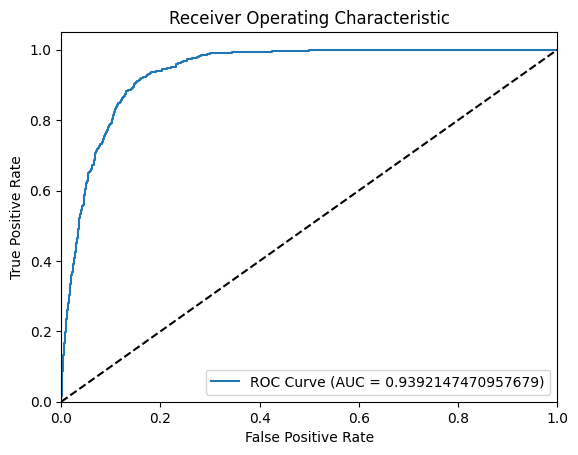

In [ ]:
# Best model evaluation
best_model = random_result.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test_minmax)

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_pred_prob = best_model.predict_proba(X_test_minmax)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Results Summary

**Summary of Various Models on Imbalanced Dataset**

| Model              | AUC   | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Accuracy |
|--------------------|-------|---------------------|------------------|--------------------|----------|
| Logistic Regression | 0.9244| 0.64                | 0.42             | 0.51               | 0.91     |
| Random Forest       | 0.9363| 0.63                | 0.51             | 0.56               | 0.91     |
| SVM                 | 0.9272| 0.67                | 0.34             | 0.45               | 0.91     |
| XGBoost             | 0.9405| 0.63                | 0.53             | 0.58               | 0.91     |
| LightGBM            | 0.9457| 0.65                | 0.56             | 0.60               | 0.91     |
| KNN                 | 0.8483| 0.57                | 0.37             | 0.45               | 0.90     |



**Summary of Various Models built on SMOTE Resampled Data**

| Model              | AUC   | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Accuracy |
|--------------------|-------|---------------------|------------------|--------------------|----------|
| Logistic Regression | 0.9192| 0.43                | 0.85             | 0.57               | 0.85     |
| Random Forest       | 0.9377| 0.50                | 0.82             | 0.62               | 0.89     |
| SVM                 | 0.9252| 0.42                | 0.89             | 0.57               | 0.84     |
| XGBoost             | 0.9397| 0.53                | 0.76             | 0.63               | 0.90     |
| LightGBM            | 0.9437| 0.52                | 0.81             | 0.63               | 0.89     |
| KNN                 | 0.8801| 0.39                | 0.82             | 0.53               | 0.83     |


**Summary of Models built after applying Cost-Sensitive Learning**

| Model              | AUC   | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Accuracy |
|--------------------|-------|---------------------|------------------|---------------------|----------|
| Logistic Regression | 0.9174 | 0.43                | 0.88             | 0.58                | 0.85     |
| Random Forest       | 0.9292 | 0.64                | 0.45             | 0.53                | 0.91     |
| SVM                 | 0.9312 | 0.40                | 0.92             | 0.56                | 0.84     |
| XGBoost             | 0.9254 | 0.47                | 0.83             | 0.60                | 0.87     |
| LightGBM            | 0.9357 | 0.45                | 0.91             | 0.61                | 0.86     |



**Summary of Models after Hyperparameter Tuning with cost sensitive learning**

| Model            | AUC   | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Accuracy |
|------------------|-------|----------------------|------------------|--------------------|----------|
| Logistic Regression | 0.9267 | 0.43                 | 0.88             | 0.58               | 0.85     |
| KNN              | 0.8670 | 0.59                 | 0.33             | 0.43               | 0.90     |
| Random Forest    | 0.9440 | 0.52                 | 0.83             | 0.64               | 0.89     |
| XGBoost          | 0.9347 | 0.51                 | 0.76             | 0.61               | 0.89     |
| LightGBM         | 0.9391 | 0.50                 | 0.84             | 0.62               | 0.88     |

**Summary of Neural Network Models**

| Model                           | AUC   | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Accuracy |
|---------------------------------|-------|---------------------|------------------|--------------------|----------|
| Feed-Forward Neural Network  | 0.9346 | 0.46                | 0.83             | 0.59               | 0.87     |
| Neural Network after Hyperparameter Tuning | 0.9392 | 0.43                | 0.91             | 0.58               | 0.85     |

**F1 Score and AUC Comparison of all the models**

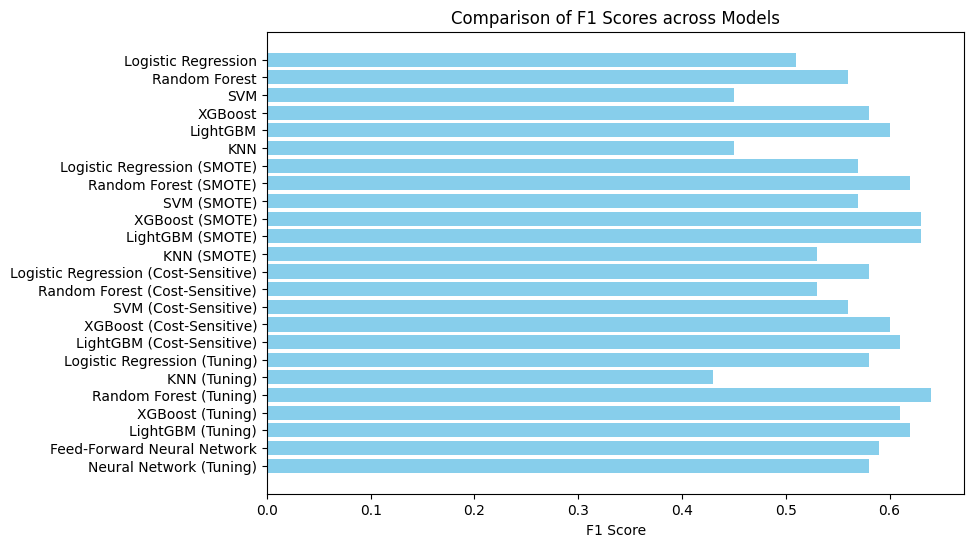

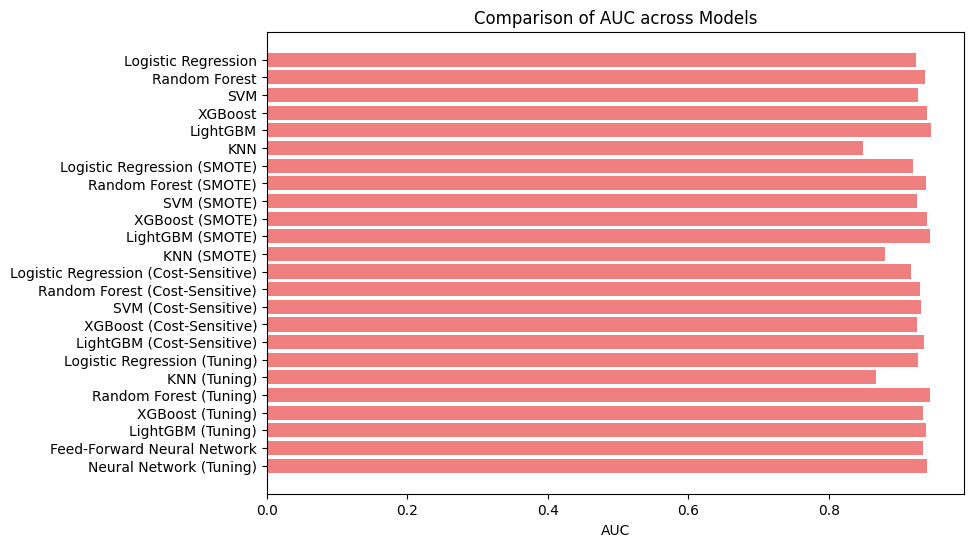

In [ ]:
# Define model names
models = [
    'Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'LightGBM', 'KNN',
    'Logistic Regression (SMOTE)', 'Random Forest (SMOTE)', 'SVM (SMOTE)', 'XGBoost (SMOTE)', 'LightGBM (SMOTE)', 'KNN (SMOTE)',
    'Logistic Regression (Cost-Sensitive)', 'Random Forest (Cost-Sensitive)', 'SVM (Cost-Sensitive)', 'XGBoost (Cost-Sensitive)', 'LightGBM (Cost-Sensitive)',
    'Logistic Regression (Tuning)', 'KNN (Tuning)', 'Random Forest (Tuning)', 'XGBoost (Tuning)', 'LightGBM (Tuning)',
    'Feed-Forward Neural Network', 'Neural Network (Tuning)'
]

# F1 Scores for each model
f1_scores = [
    0.51, 0.56, 0.45, 0.58, 0.60, 0.45,
    0.57, 0.62, 0.57, 0.63, 0.63, 0.53,
    0.58, 0.53, 0.56, 0.60, 0.61,
    0.58, 0.43, 0.64, 0.61, 0.62,
    0.59, 0.58
]

# AUC values for each model
auc_values = [
    0.9244, 0.9363, 0.9272, 0.9405, 0.9457, 0.8483,
    0.9192, 0.9377, 0.9252, 0.9397, 0.9437, 0.8801,
    0.9174, 0.9292, 0.9312, 0.9254, 0.9357,
    0.9267, 0.8670, 0.9440, 0.9347, 0.9391,
    0.9346, 0.9392
]

# Plot F1 Scores
plt.figure(figsize=(9, 6))
plt.barh(models, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('Comparison of F1 Scores across Models')
plt.gca().invert_yaxis()
plt.show()

# Plot AUC
plt.figure(figsize=(9, 6))
plt.barh(models, auc_values, color='lightcoral')
plt.xlabel('AUC')
plt.title('Comparison of AUC across Models')
plt.gca().invert_yaxis()
plt.show()

 ### Overall Insights and Conclusion

In this analysis, various models were evaluated for their ability to predict whether a client will subscribe to a term deposit. The models were assessed on several metrics including AUC, precision, recall, F1-score, and accuracy. The following insights and conclusions can be drawn:

 #### Results Summary

**1. Model Performance on Imbalanced Dataset**
- **LightGBM** achieved the highest AUC of 0.9457 and the highest F1-Score of 0.60, demonstrating its strong performance in distinguishing between classes and handling imbalanced data effectively.
- **Random Forest** followed closely with an AUC of 0.9363 and an F1-Score of 0.56, indicating a good balance between precision and recall.

**2. Model Performance on SMOTE Resampled Data**
- **XGBoost** led with an AUC of 0.9397 and an F1-Score of 0.63, suggesting it performed well after handling class imbalance through SMOTE resampling.
- **LightGBM** also performed strongly with an AUC of 0.9437 and an F1-Score of 0.63, similar to XGBoost, highlighting its robustness in handling the resampled data.

**3. Model Performance with Cost-Sensitive Learning**
- **LightGBM** outperformed other models with an AUC of 0.9357 and an F1-Score of 0.61. The model adjusted well to cost-sensitive learning, improving its recall while maintaining a decent F1-Score.
- **Random Forest** achieved an AUC of 0.9292 and an F1-Score of 0.53, indicating its effectiveness in the cost-sensitive learning setup.

**4. Model Performance After Hyperparameter Tuning**
- **Random Forest** exhibited the highest F1-Score of 0.64 and an AUC of 0.9440, making it the best model in this category. The hyperparameter tuning improved its performance, enhancing both its precision and recall.
- **LightGBM** also performed well with an F1-Score of 0.62 and an AUC of 0.9391, showing that it remains a strong contender even after tuning.

**5. Neural Network Performance**
- The **Neural Network after Hyperparameter Tuning** achieved an AUC of 0.9392 and an F1-Score of 0.58. While it showed improvement after tuning, it did not surpass the performance of the Random Forest.

### Recommended Model for Deployment

Based on the results, the **Random Forest** model after hyperparameter tuning is the recommended model for deployment. It provides the highest F1-Score of 0.64 and a strong AUC of 0.9440, indicating its ability to balance precision and recall effectively while distinguishing between classes. This model is well-suited for improving the bank's marketing strategy by accurately identifying potential subscribers and enhancing campaign effectiveness.

### Conclusion

The Random Forest model, particularly after hyperparameter tuning, demonstrates the best overall performance in terms of both F1-Score and AUC. Its robustness in handling imbalanced data and cost-sensitive learning, combined with its ability to generalize well, makes it the most suitable choice for deployment to improve marketing strategies and customer acquisition.


### **Model Deployment**

Random Forest model using the best hyperparameters.

In [ ]:
# Define the best hyperparameters
hyperparameters = {
    'bootstrap': True,
    'max_depth': 110,
    'max_features': 3,
    'min_samples_leaf': 3,
    'min_samples_split': 8,
    'n_estimators': 1000,
    'class_weight': 'balanced'
}

In [ ]:
# Initialize the Random Forest model with the specified hyperparameters
rf_model = RandomForestClassifier(**hyperparameters)

In [ ]:
# Train the model
rf_model.fit(X_train_minmax, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_minmax)

In [ ]:
# Evaluate the model
auc_score = roc_auc_score(y_test, rf_model.predict_proba(X_test_minmax)[:, 1])
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print(f"AUC Score: {auc_score:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Evaluation:
AUC Score: 0.9442
F1 Score: 0.6447

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7295
           1       0.53      0.83      0.64       943

    accuracy                           0.90      8238
   macro avg       0.75      0.87      0.79      8238
weighted avg       0.92      0.90      0.90      8238



In [ ]:
import joblib

# Save the model to disk
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as random_forest_model.pkl


In [ ]:
import pickle

# Assuming scaler was fitted during model training
scaler = MinMaxScaler()
scaler.fit(X[features_to_scale])

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)